# This notebook presents a function that generates a skew-normal probability distribution for ten snow depth bins (0m - 1m) based on the mean snow depth value, following Mallett et al. (2022; J. Glac).

In [1]:
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

# These are the statistics of the skew-normal distribution per the paper

statistics = {'a': 2.542562886886376,
  'loc': -1.114525560819975,
  'scale': 1.4973819434202296,
  'CV': 0.41696167189340216,
             }

/home/robbie/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_std_from_mean(mean_depth, CV):
    std = mean_depth * CV
    return (std)

def depth_distribution_from_mean_depth_and_edges(mean_depth, dep_bin_edges, statistics):
    dep_bin_centres = dep_bin_edges[:-1] + (dep_bin_edges[1] - dep_bin_edges[0]) / 2

    std = get_std_from_mean(mean_depth, statistics['CV'])

    std_bin_edges = (dep_bin_edges - mean_depth) / std
    std_bin_centres = std_bin_edges[:-1] + (std_bin_edges[1] - std_bin_edges[0]) / 2
    std_bw = np.nanmean(np.diff(std_bin_edges))

    fit = skewnorm.pdf(std_bin_centres,
                       statistics['a'],
                       statistics['loc'],
                       statistics['scale']) * std_bw

    return (dep_bin_centres, fit)


# This is the function that returns the probabilities for each snow depth bin. It also returns the centres of the bins for easy plotting and sanity checking

## Currently I've set the number of bins to 10, and max depth to 1m. But you could equally change the max depth to something like three times the mean depth or something like that.

In [3]:
def make_depth_dist(mean_depth,
                    n_bins = 10,
                    max_depth = 1.0):


    bin_edges = np.linspace(0,max_depth,n_bins+1)
    bin_width = np.diff(bin_edges)[0]

    bin_centres, probabilities = depth_distribution_from_mean_depth_and_edges(mean_depth,bin_edges,statistics)

    return (bin_centres, probabilities)

# Here's an example of how to call the function - just specify the mean depth

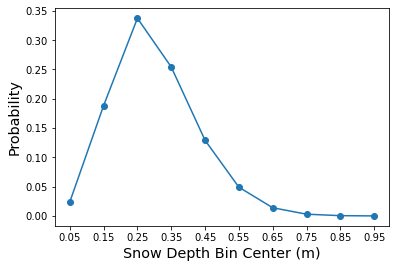

In [4]:
bin_centres, probabilities = make_depth_dist(mean_depth=0.3)

# Code below plots the output

plt.plot(bin_centres,probabilities,marker='o')
plt.ylabel('Probability',fontsize='x-large')
plt.xlabel('Snow Depth Bin Center (m)',fontsize='x-large')
plt.xticks(bin_centres)
plt.show()

# Another example where I've set the max depth to three times the mean depth.

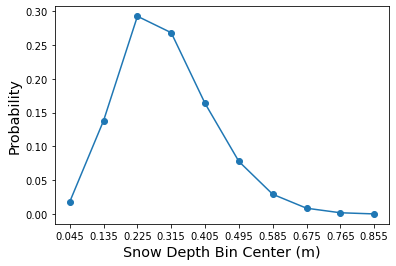

In [5]:
bin_centres, probabilities = make_depth_dist(mean_depth=0.3,max_depth=3*0.3)


plt.plot(bin_centres,probabilities,marker='o')
plt.ylabel('Probability',fontsize='x-large')
plt.xlabel('Snow Depth Bin Center (m)',fontsize='x-large')
plt.xticks(bin_centres)
plt.show()

# Another example where I've used 20 bins instead of 10

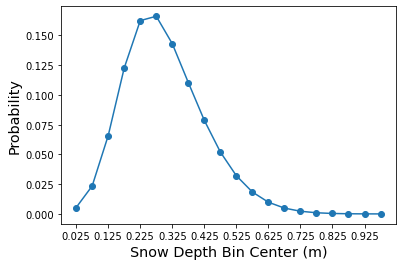

In [8]:
bin_centres, probabilities = make_depth_dist(mean_depth=0.3,n_bins=20)


plt.plot(bin_centres,probabilities,marker='o')
plt.ylabel('Probability',fontsize='x-large')
plt.xlabel('Snow Depth Bin Center (m)',fontsize='x-large')
plt.xticks(bin_centres[::2])
plt.show()

# As a double-check, you can periodically sum the probabilities to make sure that they add to (almost) 1. 

### (It will never be exactly one because we're setting a finite range of depths)

In [7]:
np.sum(probabilities)

0.9991558815400892